# Uvoz podatkov


In [1]:
import pandas as pd
import numpy as np

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

## CSV

### Primer 1: seaslug.txt

In [3]:
! head data/seaslug.txt

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5


In [7]:
pd.read_csv("data/seaslug.txt", delimiter="\t").head()

,Time,Percent
0,99,0.067
1,99,0.133
2,99,0.067
3,99,0.000
4,99,0.000


- `sep`: str, default ‘,’: Character or regex pattern to treat as the delimiter
- `delimiter`: str, optional: Alias for sep.

### Primer 2: FOOD_DES.txt

In [10]:
! head data/FOOD_DES.txt

~01001~^~0100~^~Butter, salted~^~BUTTER,WITH SALT~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87
~01002~^~0100~^~Butter, whipped, with salt~^~BUTTER,WHIPPED,W/ SALT~^~~^~~^~Y~^~~^0^~~^6.38^^^
~01003~^~0100~^~Butter oil, anhydrous~^~BUTTER OIL,ANHYDROUS~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87
~01004~^~0100~^~Cheese, blue~^~CHEESE,BLUE~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87
~01005~^~0100~^~Cheese, brick~^~CHEESE,BRICK~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87
~01006~^~0100~^~Cheese, brie~^~CHEESE,BRIE~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87
~01007~^~0100~^~Cheese, camembert~^~CHEESE,CAMEMBERT~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87
~01008~^~0100~^~Cheese, caraway~^~CHEESE,CARAWAY~^~~^~~^~~^~~^0^~~^6.38^4.27^8.79^3.87
~01009~^~0100~^~Cheese, cheddar~^~CHEESE,CHEDDAR~^~~^~~^~Y~^~~^0^~~^^^^
~01010~^~0100~^~Cheese, cheshire~^~CHEESE,CHESHIRE~^~~^~~^~~^~~^0^~~^6.38^4.27^8.79^3.87


In [15]:
pd.read_csv("data/FOOD_DES.txt", sep="^", encoding="iso-8859-1", quotechar="~", header=None, nrows=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
5,1006,100,"Cheese, brie","CHEESE,BRIE",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
6,1007,100,"Cheese, camembert","CHEESE,CAMEMBERT",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
7,1008,100,"Cheese, caraway","CHEESE,CARAWAY",NaN,NaN,NaN,NaN,0,NaN,6.38,4.27,8.79,3.87
8,1009,100,"Cheese, cheddar","CHEESE,CHEDDAR",NaN,NaN,Y,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1010,100,"Cheese, cheshire","CHEESE,CHESHIRE",NaN,NaN,NaN,NaN,0,NaN,6.38,4.27,8.79,3.87


### Primer 3: mpls_stops.csv

In [16]:
! head data/mpls_stops.csv

Unnamed: 0,id Num,date,problem,MDC,citation Issued,person Search,vehicle Search,pre Race,race,gender,lat,long,police Precinct,neighborhood
,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
6823.0,17-000003,2017-01-01 00:00:42,suspicious,MDC,,NO,NO,Unknown,Unknown,Unknown,44.96661711,-93.24645826,1,Cedar Riverside
6824.0,17-000007,2017-01-01 00:03:07,suspicious,MDC,,NO,NO,Unknown,Unknown,Male,44.98045,-93.27134,1,Downtown West
6825.0,17-000073,2017-01-01 00:23:15,traffic,MDC,,NO,NO,Unknown,White,Female,44.94835,-93.27538,5,Whittier
6826.0,17-000092,2017-01-01 00:33:48,suspicious,MDC,,NO,NO,Unknown,East African,Male,44.94836,-93.28135,5,Whittier
6827.0,17-000098,2017-01-01 00:37:58,traffic,MDC,,NO,NO,Unknown,White,Female,44.9790778,-93.26207579,1,Downtown West
6828.0,17-000111,2017-01-01 00:46:48,traffic,MDC,,NO,NO,Unknown,East African,Male,44.98053512,-93.26362691,1,Downtown West
6829.0,17-000114,2017-01-01 00:48:4

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [44]:
# uredimo imena stolpcev
mpls_columns = pd.read_csv("data/mpls_stops.csv", nrows=2).columns
mpls_columns = [name.lower().replace(" ", "_") for name in mpls_columns]
mpls_columns[0] = "case_number_id"

mpls = pd.read_csv("data/mpls_stops.csv",
                   names=mpls_columns,
                   nrows=10,
                   engine="c",
                   skiprows=2, 
                   dtype={
                       "lat": "float",
                       "long": "float"
                   },
                   na_values=["Unknown"], 
                   true_values=["YES"], 
                   false_values=["NO"],
                   parse_dates=["date"],
                   index_col="case_number_id",
                   date_format="%Y-%m-%d %H:%M:%S"
                )

#mpls.info()
mpls

,id_num,date,problem,mdc,citation_issued,person_search,vehicle_search,pre_race,race,gender,lat,long,police_precinct,neighborhood
case_number_id,,,,,,,,,,,,,,
6823.0,17-000003,2017-01-01 00:00:42,suspicious,MDC,NaN,False,False,NaN,NaN,NaN,44.966617,-93.246458,1,Cedar Riverside
6824.0,17-000007,2017-01-01 00:03:07,suspicious,MDC,NaN,False,False,NaN,NaN,Male,44.980450,-93.271340,1,Downtown West
6825.0,17-000073,2017-01-01 00:23:15,traffic,MDC,NaN,False,False,NaN,White,Female,44.948350,-93.275380,5,Whittier
6826.0,17-000092,2017-01-01 00:33:48,suspicious,MDC,NaN,False,False,NaN,East African,Male,44.948360,-93.281350,5,Whittier
6827.0,17-000098,2017-01-01 00:37:58,traffic,MDC,NaN,False,False,NaN,White,Female,44.979078,-93.262076,1,Downtown West
6828.0,17-000111,2017-01-01 00:46:48,traffic,MDC,NaN,False,False,NaN,East African,Male,44.980535,-93.263627,1,Downtown West
6829.0,17-000114,2017-01-01 00:48:46,suspicious,MDC,NaN,False,False,NaN,Black,Male,44.980808,-93.273141,1,Downtown West
6830.0,17-000120,2017-01-01 00:50:55,traffic,MDC,NaN,False,False,NaN,Other,Female,44.982093,-93.238155,2,Marcy Holmes
6831.0,17-000127,2017-01-01 00:57:10,traffic,MDC,NaN,False,False,NaN,White,Male,44.990319,-93.252042,2,Nicollet Island - East Bank


In [46]:
%timeit mpls = pd.read_csv('data/mpls_stops.csv', names=mpls_columns, skiprows=2, engine='python')

1.56 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%timeit mpls = pd.read_csv('data/mpls_stops.csv', names=mpls_columns, skiprows=2, engine='c')

586 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Primer: iperf.txt

In [2]:
! head data/iperf.txt

Wed Aug 15 19:35:11 CEST 2018
Connecting to host x.x.x.x, port 5201
[  4] local x.x.x.x port 48944 connected to x.x.x.x port 5201
[ ID] Interval           Transfer     Bandwidth       Retr  Cwnd
[  4]   0.00-1.00   sec   375 MBytes  3.14 Gbits/sec  273    471 KBytes
[  4]   1.00-2.00   sec   428 MBytes  3.59 Gbits/sec  145    376 KBytes
[  4]   2.00-3.00   sec   360 MBytes  3.02 Gbits/sec  148    454 KBytes
[  4]   3.00-4.00   sec   339 MBytes  2.84 Gbits/sec   83    407 KBytes
[  4]   4.00-5.00   sec   305 MBytes  2.56 Gbits/sec  104    414 KBytes
[  4]   5.00-6.00   sec   301 MBytes  2.53 Gbits/sec  186    440 KBytes


In [38]:
import datetime

def get_start_time() -> datetime.datetime:
    with open("data/iperf.txt", "r") as file_reader:
        timestamp = file_reader.readline().strip()

    return datetime.datetime.strptime(timestamp, "%a %b %d %H:%M:%S CEST %Y")

start_time = get_start_time()
raw_data = pd.read_csv("data/iperf.txt", sep="  ", skiprows=4, header=None, engine="python")
raw_data = raw_data.drop(columns=[0, 1, 2, 3, 7])
raw_data["timestamp"] = pd.date_range(start_time, periods=raw_data.shape[0], freq='1s')
raw_data = raw_data.set_index("timestamp")
raw_data.columns = ["transfer_mbytes", "bandwidth_gbit_sec", "retr", "cwnd_kbytes"]
raw_data["transfer_mbytes"] = raw_data["transfer_mbytes"].str.replace("MBytes", "").astype("int")
raw_data["bandwidth_gbit_sec"] = raw_data["bandwidth_gbit_sec"].str.replace("Gbits/sec", "").astype("float")
raw_data["cwnd_kbytes"] = raw_data["cwnd_kbytes"].str.replace("KBytes", "").astype("int")
raw_data.head(3)

,transfer_mbytes,bandwidth_gbit_sec,retr,cwnd_kbytes
timestamp,,,,
2018-08-15 19:35:11,375,3.14,273,471
2018-08-15 19:35:12,428,3.59,145,376
2018-08-15 19:35:13,360,3.02,148,454


In [46]:
print(f"Total transfer: {raw_data['transfer_mbytes'].sum()} Mbytes")
print(f"Mean bandwidth: {raw_data['bandwidth_gbit_sec'].mean():.2f} Gbit/sec")

Total transfer: 4211 Mbytes
Mean bandwidth: 3.16 Gbit/sec


<Axes: title={'center': 'Network mesurment'}, xlabel='timestamp'>

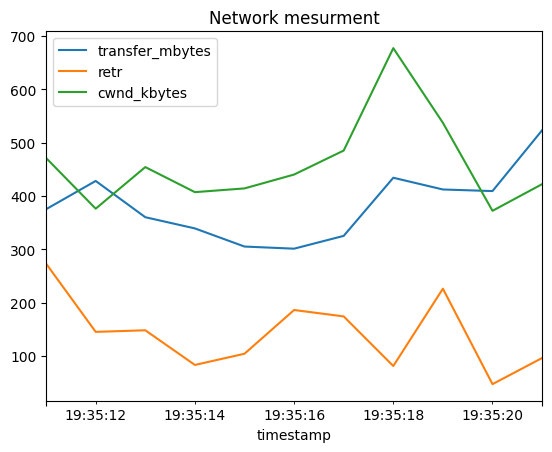

In [52]:
raw_data.plot(y=["transfer_mbytes", "retr", "cwnd_kbytes"], use_index=True, title="Network mesurment")

## JSON

https://jsonformatter.curiousconcept.com/

https://pandas.pydata.org/docs/reference/api/pandas.read_json.html

In [53]:
dfjo = pd.DataFrame(dict(A=range(1, 4), B=range(4, 7), C=range(7, 10)), columns=list("ABC"), index=list("xyz"))
dfjo

,A,B,C
x,1,4,7
y,2,5,8
z,3,6,9


In [54]:
dfjo.to_json(orient="columns")

'{"A":{"x":1,"y":2,"z":3},"B":{"x":4,"y":5,"z":6},"C":{"x":7,"y":8,"z":9}}'

In [55]:
dfjo.to_json(orient="index")

'{"x":{"A":1,"B":4,"C":7},"y":{"A":2,"B":5,"C":8},"z":{"A":3,"B":6,"C":9}}'

In [56]:
dfjo.to_json(orient="records")

'[{"A":1,"B":4,"C":7},{"A":2,"B":5,"C":8},{"A":3,"B":6,"C":9}]'

In [57]:
dfjo.to_json(orient="values")

'[[1,4,7],[2,5,8],[3,6,9]]'

In [58]:
dfjo.to_json(orient="split")

'{"columns":["A","B","C"],"index":["x","y","z"],"data":[[1,4,7],[2,5,8],[3,6,9]]}'

In [59]:
dfjo.to_json(orient="table")

'{"schema":{"fields":[{"name":"index","type":"string"},{"name":"A","type":"integer"},{"name":"B","type":"integer"},{"name":"C","type":"integer"}],"primaryKey":["index"],"pandas_version":"1.4.0"},"data":[{"index":"x","A":1,"B":4,"C":7},{"index":"y","A":2,"B":5,"C":8},{"index":"z","A":3,"B":6,"C":9}]}'

### Primer: oceans.json

In [74]:
# 1. način
oceans = pd.read_json("data/ocenas.json", orient="columns")
oceans = oceans.drop(columns=["description"], index=["title", "units", "base_period", "missing"])
oceans.index.name = "year"
oceans = oceans.rename(columns={"data": "temp_anomaly_clesius"})
oceans.index = pd.to_datetime(oceans.index).year
oceans.head()

,temp_anomaly_clesius
year,
1880,-0.12
1881,-0.09
1882,-0.10
1883,-0.18
1884,-0.27


<Axes: xlabel='year'>

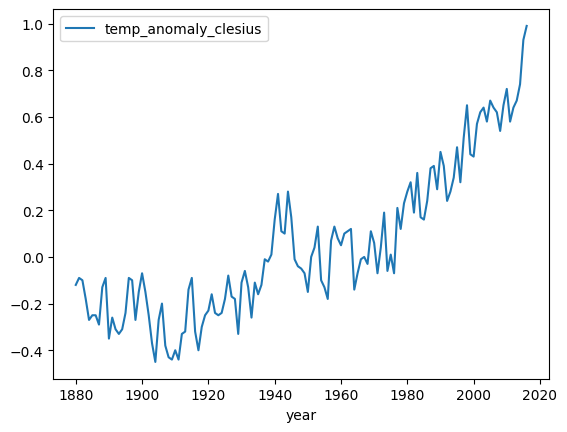

In [76]:
oceans.plot()

In [77]:
oceans.to_csv("data/ocens.csv")

In [87]:
# 2. način
import json

with open("data/ocenas.json", "r") as json_file:
    data = json.load(json_file)

oceans = pd.DataFrame(data["data"].values(), index=data["data"].keys())
oceans = oceans.rename(columns={0: "temp_anomaly_clesius"})
oceans.index.name = "year"
oceans.index = pd.to_datetime(oceans.index).year
oceans.head()

,temp_anomaly_clesius
year,
1880,-0.12
1881,-0.09
1882,-0.10
1883,-0.18
1884,-0.27


### Primer: temperatures.json

In [93]:
import json
import io

with open("data/temperatures.json") as f:
    data = json.load(f)

temperatures = pd.read_json(io.StringIO(json.dumps(data["data"])), orient='index')
temperatures.head()

,value,anomaly
189512,50.34,-1.68
189612,51.99,-0.03
189712,51.56,-0.46
189812,51.43,-0.59
189912,51.01,-1.01


<Axes: >

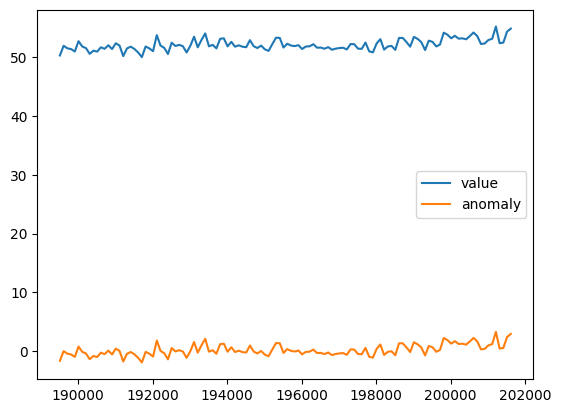

In [94]:
temperatures.plot()

### Primer: cities.json

In [120]:
from pandas import json_normalize

cities = pd.read_json("data/cities.json", orient="records")
# dodamo nova stolpca za geolokacijo
geolocation = json_normalize(cities["geolocation"])
cities["geo_longitude"] = geolocation["coordinates"].str[0]
cities["geo_latitude"] = geolocation["coordinates"].str[1]
cities = cities.drop(columns=[":@computed_region_cbhk_fwbd", ":@computed_region_nnqa_25f4", "geolocation", "id"])
cities = cities.set_index("name")
cities["year"] = cities["year"].str[:4].astype("float")
cities.head()


,nametype,recclass,mass,fall,year,reclat,reclong,geo_longitude,geo_latitude
name,,,,,,,,,
Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,6.08333,50.77500
Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,10.23333,56.18333
Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,-113.00000,54.21667
Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,-99.90000,16.88333
Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,-64.95000,-33.16667


In [125]:
cities.loc[cities["year"] > 1900].head(2)

,nametype,recclass,mass,fall,year,reclat,reclong,geo_longitude,geo_latitude
name,,,,,,,,,
Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,10.23333,56.18333
Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,-113.00000,54.21667


## Python pickle format

In [127]:
cities.to_pickle("data/cities.pkl")

In [129]:
cities_new = pd.read_pickle("data/cities.pkl")

## Excel Files

In [131]:
pd.ExcelFile("data/battledeath.xlsx").sheet_names

['2002', '2004']

https://pandas.pydata.org/docs/getting_started/install.html#excel-files

In [132]:
bdf_2002 = pd.read_excel("data/battledeath.xlsx", sheet_name="2002")
bdf_2004 = pd.read_excel("data/battledeath.xlsx", sheet_name="2004")

In [135]:
bdf_2002.head(3)

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120


In [136]:
bdf_2004.head(3)

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277


## Pisanje in pretvarjanje med formati

In [150]:
organizations = pd.read_csv("https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/organizations/organizations-1000.csv")
organizations = organizations.sort_values(by="Number of employees", ascending=False)
organizations = organizations.drop(columns=["Index"])
organizations.columns = [column_name.lower().replace(" ", "_") for column_name in organizations.columns]
organizations = organizations.set_index("organization_id")
organizations.head(3)

,name,website,country,description,founded,industry,number_of_employees
organization_id,,,,,,,
9AF2278d3Ae4DD2,Walker Group,http://weeks.net/,Palau,Compatible reciprocal firmware,2000,Civic / Social Organization,9952
ab7EcA27EcCbc44,Macdonald PLC,https://www.brown.biz/,Rwanda,Horizontal neutral algorithm,1971,Gambling / Casinos,9950
FDdF45e1defEBBC,Ware LLC,http://pratt.net/,Cuba,Decentralized client-driven throughput,1998,Real Estate / Mortgage,9941


In [151]:
# export to csv
organizations.to_csv("data/organizations.csv")

In [152]:
# export to json
organizations.to_json("data/organizations.json", orient="records")

In [153]:
# export to excel
organizations.to_excel("data/organizations.xlsx", sheet_name="data_org")